In [11]:
import pandas as pd
import seaborn as sns
import numpy as np

# A vous de jouer

H0 = il n’y a pas de différence entre les moyennes des groupes.

H1 = il y en a bien une.

In [2]:
from scipy.stats import f_oneway

In [3]:
data_ANOVA = pd.read_csv("/content/Données clients - Feuille 1_nettoyées.csv")

In [4]:
data_ANOVA.head()

,ID_Client,âge,genre,type de voyage,destination,saison de voyage,durée de voyage (en jours),nombre de personnes,prix total,mode de paiement,évaluation sur 5,date de début de voyage,date de fin de voyage,période de voyage,budget_voyage_annuel
0,1,32,M,culturel,Bali,été,10,2,4425,Virement,3,07-12-2023,09-12-2023,07-12-2023 au 09-12-2023,6407
1,2,38,Autre,détente,Népal,printemps,11,1,5743,Carte de crédit,2,01-09-2023,03-09-2023,01-09-2023 au 03-09-2023,4226
2,3,39,Autre,détente,Norvège,hiver,15,2,9565,Virement,3,22-02-2024,23-02-2024,22-02-2024 au 23-02-2024,5144
3,4,49,Autre,aventure,Japon,printemps,16,2,9833,Virement,2,31-08-2023,03-09-2023,31-08-2023 au 03-09-2023,4307
4,5,23,M,aventure,Islande,été,8,4,2358,Paypal,3,29-08-2023,01-09-2023,29-08-2023 au 01-09-2023,4348


In [5]:
data_ANOVA.dtypes

,0
ID_Client,int64
âge,int64
genre,object
type de voyage,object
destination,object
saison de voyage,object
durée de voyage (en jours),int64
nombre de personnes,int64
prix total,int64
mode de paiement,object


<Axes: xlabel='type de voyage', ylabel='âge'>

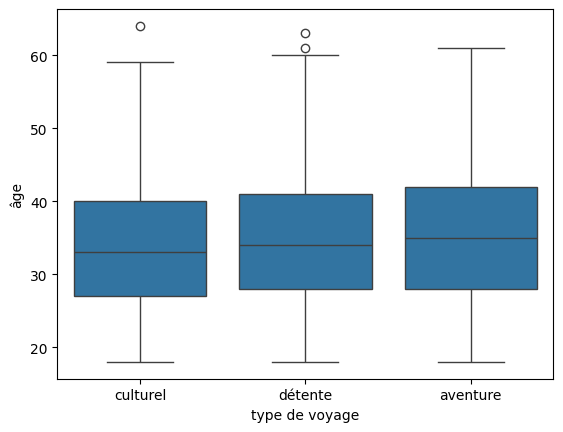

In [6]:
sns.boxplot(x="type de voyage", y="âge", data=data_ANOVA)

In [9]:
# Sélectionner les colonnes pertinentes pour chaque type de voyage
aventure = data_ANOVA[data_ANOVA['type de voyage'] == 'aventure']['âge']
detente = data_ANOVA[data_ANOVA['type de voyage'] == 'détente']['âge']
culturel = data_ANOVA[data_ANOVA['type de voyage'] == 'culturel']['âge']

In [18]:
print("Moyenne pour le groupe aventure:", round(np.mean(aventure)))
print("Moyenne pour le groupe detente:", round(np.mean(detente)))
print("Moyenne pour le groupe culturel:", round(np.mean(culturel)))

Moyenne pour le groupe aventure: 35
Moyenne pour le groupe detente: 35
Moyenne pour le groupe culturel: 34


In [10]:
f_stat, p_value = f_oneway(aventure, detente, culturel)

print(f"Statistique de test F: {f_stat}")
print(f"Valeur p: {p_value}")

Statistique de test F: 1.428035019580455
Valeur p: 0.24039477905682843


La statistique F suggère une différence entre les groupes.

La valeur p est supérieur à 0.05 ce qui ne nous permet pas de rejetter H0. On ne peut donc pas dire qu'il y a une différence significative de moyenne entre les groupes.